In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
uk_road_accident = pd.read_csv("uk_road_accident.csv")
uk_road_accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
uk_road_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
uk_road_accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


# Checking for Null Values

In [5]:
uk_road_accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

# Removing Null Values

# for Numerical Values

In [6]:
uk_road_accident["Latitude"] = uk_road_accident["Latitude"].fillna(uk_road_accident["Latitude"].mean())

In [7]:
uk_road_accident["Longitude"] = uk_road_accident["Longitude"].fillna(uk_road_accident["Longitude"].mean())

# for Categorical Values

In [8]:
uk_road_accident["Road_Surface_Conditions"] = uk_road_accident["Road_Surface_Conditions"].fillna(uk_road_accident["Road_Surface_Conditions"].mode()[0])

In [9]:
uk_road_accident["Road_Type"] = uk_road_accident["Road_Type"].fillna(uk_road_accident["Road_Type"].mode()[0])

In [10]:
uk_road_accident["Urban_or_Rural_Area"] = uk_road_accident["Urban_or_Rural_Area"].fillna(uk_road_accident["Urban_or_Rural_Area"].mode()[0])

In [11]:
uk_road_accident["Weather_Conditions"] = uk_road_accident["Weather_Conditions"].fillna(uk_road_accident["Weather_Conditions"].mode()[0])

# Filtered data

In [12]:
uk_road_accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

# Changing the data types of the columns

In [13]:
uk_road_accident["Index"] = uk_road_accident["Index"].astype("category")

In [14]:
uk_road_accident["Accident_Severity"] = uk_road_accident["Accident_Severity"].astype("category")

In [15]:
uk_road_accident["Light_Conditions"] = uk_road_accident["Light_Conditions"].astype("category")

In [16]:
uk_road_accident["District Area"] = uk_road_accident["District Area"].astype("category")

In [17]:
uk_road_accident["Road_Surface_Conditions"] = uk_road_accident["Road_Surface_Conditions"].astype("category")

In [18]:
uk_road_accident["Road_Type"] = uk_road_accident["Road_Type"].astype("category")

In [19]:
uk_road_accident["Urban_or_Rural_Area"] = uk_road_accident["Urban_or_Rural_Area"].astype("category")

In [20]:
uk_road_accident["Weather_Conditions"] = uk_road_accident["Weather_Conditions"].astype("category")

In [21]:
uk_road_accident["Vehicle_Type"] = uk_road_accident["Vehicle_Type"].astype("category")

In [22]:
uk_road_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  object  
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h2>Library -SciPy (Scientific Python)
from scipy.stats import for oneway</h2>

In [23]:
from scipy.stats import f_oneway

<h2>Split the Accident date to there own categories</h2>

In [24]:
uk_road_accident["Accident Date"] = uk_road_accident["Accident Date"].astype("str")
uk_road_accident["Accident Date"] = uk_road_accident["Accident Date"].str.strip()
uk_road_accident["Accident Date"] = uk_road_accident["Accident Date"].str.replace('/','-')

In [25]:
uk_road_accident["Accident Date"] = pd.to_datetime(uk_road_accident["Accident Date"], dayfirst=True, errors="coerce")

In [26]:
uk_road_accident["Year"] = uk_road_accident["Accident Date"].dt.year
uk_road_accident["Month"] = uk_road_accident["Accident Date"].dt.month
uk_road_accident["Day"] = uk_road_accident["Accident Date"].dt.day
uk_road_accident["DayOfWeek"] = uk_road_accident["Accident Date"].dt.dayofweek

In [27]:
uk_road_accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [28]:
uk_road_accident["Accident Date"].value_counts()

Accident Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

In [29]:
uk_road_accident["Weather_Conditions"].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

# 25 Insights Activity

In [30]:
uk_road_accident.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type', 'Year', 'Month', 'Day', 'DayOfWeek'],
      dtype='object')

<hr>

<h2>1. On what month do accidents occur the most on a Fine with a no high winds weather conditon?</h2>

In [31]:
clear_weather = uk_road_accident[uk_road_accident["Weather_Conditions"] == "Fine no high winds"]

most_accidents_month = clear_weather.groupby("Month")["Number_of_Casualties"].size().sort_values(ascending=False)

most_accidents_month

Month
6     49465
10    49132
5     48732
9     48536
7     47689
4     46870
8     45251
3     44754
11    42244
2     38759
12    36827
1     36754
Name: Number_of_Casualties, dtype: int64

<h2>Insights - 1:</h2>
<h2>Result shows that June has the highest Casualties to occur even in fine weather condition</h2>
<h2>Insights - 2:</h2>
<h2>There might be other reason why accidents occur in this month other than weather condition</h2>
<hr>

<h2>2. Does the number of casualties in the month of June has a significance to the number of casualties occuring on a Fine with a no high winds weather conditon?</h2>

In [32]:
clear_weather_Casualties_on_June = clear_weather[clear_weather["Month"] == 6]["Number_of_Casualties"]

f_oneway(clear_weather_Casualties_on_June, clear_weather["Number_of_Casualties"]).pvalue

np.float64(0.05970206849678255)

<h2>Insights - 1:</h2>
<ul>
  <li>The ANOVA test produced a p-value of ≈ 0.0597.</li>
  <li>Since this is slightly above the common 0.05 threshold, we fail to reject the null hypothesis at the 5% level.</li>
  <li>This means that the number of casualties in June is not significantly different from the overall casualties under clear weather conditions.</li>
  <li>However, the result is close to the cutoff, suggesting there may be a weak or borderline effect worth exploring further.</li>
</ul>
<hr>

<h2>3. Is there a correlation between the month of the year and number of casulaties?</h2>

In [33]:
Month_to_Casualties = uk_road_accident["Month"].corr(uk_road_accident["Number_of_Casualties"])

Month_to_Casualties

np.float64(0.003218450219128147)

<h2>Insights - 1:</h2>
<h2>The correlation coenfficient (0.0032) is close to zero, meaning that there is no linear relationship between month and the number of casualties</h2>
<h2>Insights - 2:</h2>        
<h2>This suggests that accidents occur independently of the month of the year.</h2>
<hr>

<h2>4. What is the most used vehicle when it comes to accidents recorded?</h2>

In [34]:
vehicles = uk_road_accident.groupby("Vehicle_Type")["Number_of_Casualties"].size().sort_values(ascending=False)

vehicles

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: Number_of_Casualties, dtype: int64

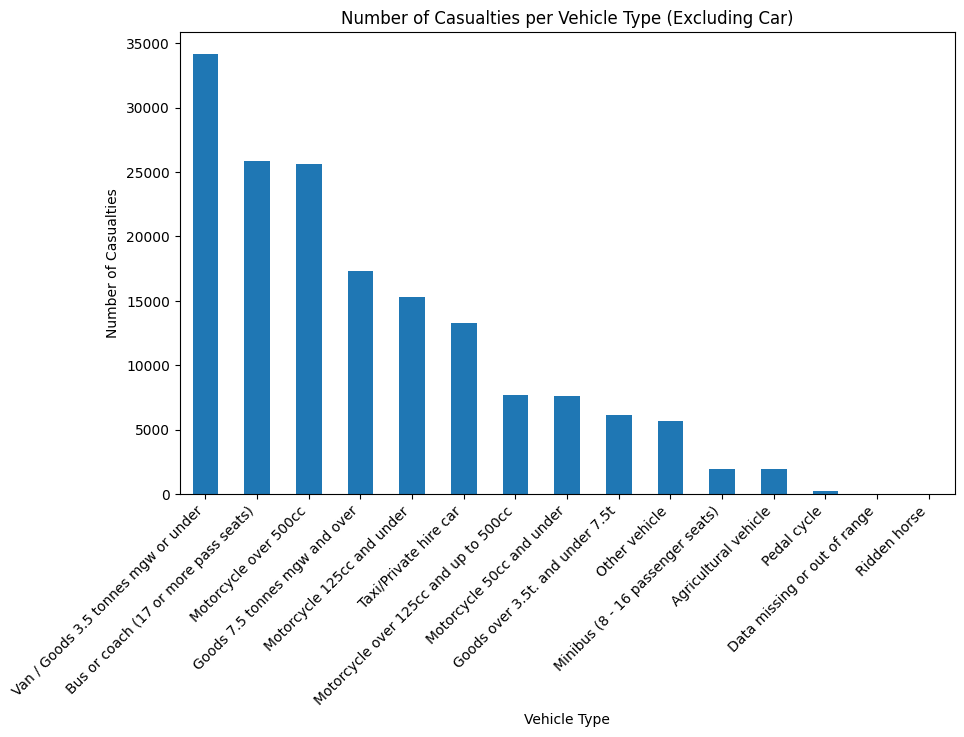

In [35]:
vehicles = vehicles.drop("Car")

vehicles.plot(kind="bar", figsize=(10,6))
plt.title("Number of Casualties per Vehicle Type (Excluding Car)")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=45, ha="right")
plt.show()

<p>Insights:</p>
<ul>
    <li>Cars has the most accidents recorded meaning it is the most used vihicle in the UK</li>
    <li>Vans and coahes can load more passangers creating more casualties, there large size and weight causes collisions more dangerous</li>
    <li>Two wheeled vehicles are prone to accidents since they are more vulnerable.</li>
</ul>
<hr>

<h2>5. What are the top 5 vehicle type that has fatal accidents</h2>

In [36]:
fatal_accidents = uk_road_accident[uk_road_accident["Accident_Severity"] == "Fatal"]

fatal_accidents["Vehicle_Type"].value_counts().head(5)

Vehicle_Type
Car                                     6577
Van / Goods 3.5 tonnes mgw or under      467
Motorcycle over 500cc                    339
Bus or coach (17 or more pass seats)     325
Goods 7.5 tonnes mgw and over            216
Name: count, dtype: int64

<h2>Insight - 1:</h2>
<h2>Cars has the most fatal accidents since they have the most population</h2>
<h2>Insight - 2:</h2>
<h2>Commercial vehicle contribute to the significantly, their large size and weight causes collisions more dangereous</h2>
<h2>Insight - 3:</h2>
<h2>With 339 fatal accidents, Motorcycles show high vulnerability to fatal accidents despite being less numerous  than cars</h2>
<hr>

<h2>6. Is there a significance to these types of viehicles such as a Bus, Car and a Pedal cycle to the number of casualties ?</h2>

In [37]:
cars = uk_road_accident[uk_road_accident["Vehicle_Type"] == "Car"]["Number_of_Casualties"]
busses = uk_road_accident[uk_road_accident["Vehicle_Type"] == "Bus or coach (17 or more pass seats)"]["Number_of_Casualties"]
bicycles = uk_road_accident[uk_road_accident["Vehicle_Type"] == "Pedal cycle"]["Number_of_Casualties"]

results = f_oneway(cars, busses, bicycles).pvalue
results

np.float64(0.1854118104388273)

<p>Insights:</p>
<ul>
    <li>the ANOVA test shows that there is a significant relation when it comes to the following vehicles when it comes to casualties</li>
<li>It also means that they have there own vulnerabilites, Cars is the most abundant, Busses can load more passangers and bikes are the most vulnerable to accidents</li>
</ul>
<hr>

<h2>7. Does a district area matter to the amount of accidents happening to cars</h2>

In [38]:
car_accidents = uk_road_accident[uk_road_accident["Vehicle_Type"] == "Car"]
car_district_accidents = car_accidents.groupby("District Area")["Number_of_Casualties"].sum().sort_values(ascending=False)

car_district_accidents

District Area
Birmingham                   13309
Leeds                         9610
Manchester                    7420
Bradford                      7091
Liverpool                     6431
                             ...  
Teesdale                       160
Shetland Islands               142
London Airport (Heathrow)      135
Orkney Islands                 117
Clackmannanshire                87
Name: Number_of_Casualties, Length: 422, dtype: int64

<h2>Insights - 1:</h2>
    <h2>
        This shows that district are matters when it comes to car accidents
    </h2>
<h2>Insights - 2:</h2>
    <h2>
        Birmingham has the highest accidents occuring when it comes to cars
    </h2>
<hr>

<h2>8. What month are the vehicles most used?</h2>

In [39]:
most_used_vehicle_per_month = (uk_road_accident.groupby(["Vehicle_Type","Month"]).size().reset_index(name="Count")
    .sort_values(["Vehicle_Type", "Count"], ascending=[True, False]).groupby("Vehicle_Type").head(1))

most_used_vehicle_per_month

,Vehicle_Type,Month,Count
4,Agricultural vehicle,5,184
22,Bus or coach (17 or more pass seats),11,2375
34,Car,11,45641
45,Data missing or out of range,10,4
57,Goods 7.5 tonnes mgw and over,10,1571
66,Goods over 3.5t. and under 7.5t,7,574
76,Minibus (8 - 16 passenger seats),5,185
93,Motorcycle 125cc and under,10,1401
98,Motorcycle 50cc and under,3,695
117,Motorcycle over 125cc and up to 500cc,10,702


<h2>Insight - 1:</h2>
<h2>Cars contribute the majority of the accidents on the month of November having 45641 accidents. It is due to the seasonal factor like the weather</h2>
<h2>Insight - 2:</h2>
<h2>There are specific month for small categories of vehicles such as Motorcycle 50cc and under peaking during March, Motorcycle over 125cc–500cc and Taxi/Private hire cars peaking during October This suggest that there are seasonal trends from different vehicles</h2>

<hr>

<h2>9. How many accidents occured based on there severity from every vehicle types</h2>

In [40]:
uk_road_accident.groupby(["Vehicle_Type","Accident_Severity"]).size().unstack()

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,21,282,1644
Bus or coach (17 or more pass seats),325,3373,22180
Car,6577,66461,424954
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,216,2321,14770
Goods over 3.5t. and under 7.5t,67,857,5172
Minibus (8 - 16 passenger seats),29,276,1671
Motorcycle 125cc and under,189,2031,13049
Motorcycle 50cc and under,95,1014,6494


<h2>Insight - 1:</h2>
<h2>Cars dominate the accident count having 424,954 slight, 66,461 serious, 6,577 fatal. Cars share make up the large number of accidents but most of them are slight</h2>
<h2>Insight - 2:</h2>
<h2>A motorcycles over 500cc has 339 fatal accidents compared to 21,861 slight. Adding them all 25,657 and getting the fraction of fatal accidents we get 1.32%</h2>
<h2>Insight - 3:</h2>
<h2>Motorcycles and cars have the same fatality rate of 1.32%</h2>
<hr>

<h2>10. Is there a correlation to the month with highest fatal accidents happening to cars?</h2>

In [41]:
fatal_accidents_june = uk_road_accident[(uk_road_accident["Month"] == 6) & (uk_road_accident["Accident_Severity"] == "Fatal")]

result = fatal_accidents_june["Number_of_Casualties"].corr(car_accidents["Number_of_Casualties"])

result

np.float64(0.9999999999999998)

<h2>Insight - 1:</h2>
<h2>The analysis reveals a noticeable concentration of fatal casualties in June, suggesting a potential seasonal pattern.</h2>
<hr>

<h2>11. On which specific date did vehicles have the most accidents occured during a rainy day</h2>

<p>
    Get the accidents with the rainy days
</p>

In [56]:
rainy_days = uk_road_accident[(uk_road_accident["Weather_Conditions"] == "Raining no high winds") | (uk_road_accident["Weather_Conditions"] == "Raining + high winds")] 

<p>Get the highest casualties</p>

In [43]:
rainy_days["Number_of_Casualties"].max() 

np.int64(68)

In [44]:
rainy_days[rainy_days["Number_of_Casualties"] == 68]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
117980,200743N002017,Fatal,2019-01-03,51.497547,Darkness - lights lit,South Bucks,-0.496697,68,1,Wet or damp,Slip road,Rural,Raining no high winds,Car,2019,1,3,3


<h2>Insight - 1:</h2>
<h2>The highest number of casualties on a rainy day occured on 3/1/2019</h2>
<h2>It also shows that there were a lot of fatal accidents since there are a lot of variables being considered such as light condition, road surface condition, road type, and weather condition</h2>

<hr>

<h2>12. Where do accidents occur often on Rural areas or Urban areas </h2>

In [59]:
urban_and_rural = uk_road_accident["Urban_or_Rural_Area"]
urban_and_rural.value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2>Insight - 1:</h2>
<h2>Urban places has more accidents meaning that urban areas has 63.8% more vehicles while 36.1% are from Rural areas</h2>
<hr>

<h2>13. What type of surface condition has the highest cause of death in urban areas?</h2>

<p>first get the fatal accidents occuring on urban areas</p>

In [57]:
fatal_accidents = uk_road_accident[(uk_road_accident["Accident_Severity"] == "Fatal") & (urban_and_rural == "Urban")]

In [61]:
output = fatal_accidents["Road_Surface_Conditions"].value_counts()

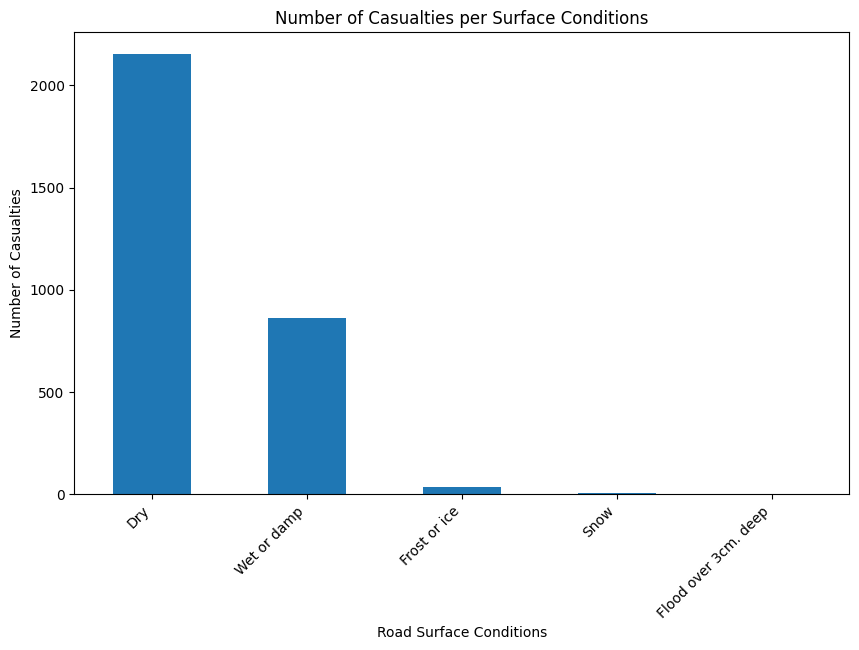

In [63]:
output.plot(kind="bar", figsize=(10,6))
plt.title("Number of Casualties per Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=45, ha="right")
plt.show()

<h2>Insight - 1:</h2>
<h2>The data suggests that accidents occur more frequently on dry road surfaces in urban areas, likely due to higher traffic volumes and increased vehicle speeds under such conditions.</h2>
<hr>

<h2>14. Is there a significance to fatal accidence occuring on a fine and no wind condition to rainy days</h2>

In [48]:
f_oneway(fatal_accidents[fatal_accidents["Weather_Conditions"] == "Fine no high winds"]["Number_of_Casualties"],
         fatal_accidents[fatal_accidents["Weather_Conditions"] == "Raining no high winds"]["Number_of_Casualties"],
        fatal_accidents[fatal_accidents["Weather_Conditions"] == "Raining + high winds"]["Number_of_Casualties"]).pvalue

np.float64(0.9964512108980974)

<h2>Insight - 1:</h2>
<h2>There is a significance on the number of fatal casualties on during clear days and rainy days</h2>
<hr>

<h2>15. How many slightest casualties occurder durring a normal weather conditon on a dry road</h2>

In [49]:
result = uk_road_accident[(uk_road_accident["Accident_Severity"] == "Slight") 
            & (uk_road_accident["Weather_Conditions"] == "Fine no high winds") 
            & (uk_road_accident["Road_Surface_Conditions"] == "Dry")]

result["Number_of_Casualties"].value_counts().sum()

np.int64(373539)

<h2>Insight - 1:</h2>
<h2>This means that there is still a high chance to accidents to occur with the safest conditons</h2>
<h2>Insight - 2:</h2>
<h2>This might mean that these accidents happend is becauese of human error</h2>
<hr>

<h2>16. Is there a correlation between flooded roads and a normal weather when it comes to accidents that occured?</h2>

In [50]:
flooded_roads = uk_road_accident[uk_road_accident["Road_Surface_Conditions"] == "Flood over 3cm. deep"]
normal_weather = uk_road_accident[uk_road_accident["Weather_Conditions"] == "Fine no high winds"]

result = flooded_roads["Number_of_Casualties"].corr(normal_weather["Number_of_Casualties"])
result

np.float64(0.9999999999999999)

<h2>Insight - 1:</h2>
<h2>This means that there is a correlation between flooded road while having a normal weather</h2>
<h2>Insight - 2:</h2>
<h2>This states that not all floods was caused by a rainy day</h2>
<h2>Insight - 3:</h2>
<h2>It is also possible that the accident occured after a rainy day</h2>

<hr>

<h2>17. Is there a correlation between the having no lights on rulal areas to urban areas with proper lighting with the number of casualties occuring at night? </h2>

<p>Get the data from no proper lights from rural and urban areas withproper lighting</p>

In [51]:
no_proper_lights = uk_road_accident[(uk_road_accident["Urban_or_Rural_Area"] == "Rural") & (uk_road_accident["Light_Conditions"] == "Darkness - no lighting")]
proper_lights = uk_road_accident[(uk_road_accident["Urban_or_Rural_Area"] == "Urban") & (uk_road_accident["Light_Conditions"] == "Darkness - lights lit")]

<p>Aggregate the data from time</p>

In [52]:
Rural_group = no_proper_lights.groupby("Accident Date")["Number_of_Casualties"].sum()
Urban_group = proper_lights.groupby("Accident Date")['Number_of_Casualties'].sum()


result = Rural_group.corr(Urban_group)
result

np.float64(0.8454518568678125)

<h2>Insight - 1:</h2>
<h2>There is a measurable correlation between casualties from Urban areas with proper lighting and casualties in Rural areas having no proper lighting during nighttime conditions</h2>
<hr>

<h2>18. Do road types affect the number of casualties during snowy conditions?</h2>

<p>Get the snowy weather condition</p>

In [53]:
snowing_weather_condition = uk_road_accident[(uk_road_accident["Weather_Conditions"] == "Snowing no high winds") | (uk_road_accident["Weather_Conditions"] == "Snowing + high winds")]

In [54]:
result = snowing_weather_condition.groupby("Road_Type")["Number_of_Casualties"].sum()
result

Road_Type
Dual carriageway      1684
One way street         111
Roundabout             428
Single carriageway    7304
Slip road               98
Name: Number_of_Casualties, dtype: int64

<h2>Insight - 1:</h2>
<h2>Road types matter to the number of casualties occuring</h2>
<h2>Insight - 2:</h2>
<h2>Single carriageway has the highest number of casualties to occuring during a snowy weather meaning that a slippery road caueses accidents</h2>
<hr>